# 线性回归简单实现

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
from mxnet import autograd, nd
import random 
from IPython import display

## 生成数据集

In [4]:
num_inputs = 2
num_examples = 1000
true_w = nd.array([2, -3.4])
true_b = 4.2
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = true_w[0] * features[:,0] + true_w[1] * features[:,1] + true_b
labels += nd.random.normal(scale=0.01,shape=labels.shape) 

In [6]:
print(features[0], labels[0])


[-0.15963984  1.7974477 ]
<NDArray 2 @cpu(0)> 
[-2.21596]
<NDArray 1 @cpu(0)>


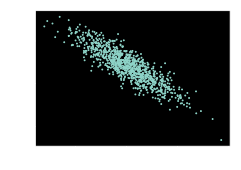

In [10]:
def use_svg_display():
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.scatter(features[:, 1].asnumpy(), labels.asnumpy(), 1);

## 读取数据

In [17]:
# 函数被保存在delzh包中
def data_iter(batch_size, features, labels):
    num_examples = len(labels)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j), labels.take(j)

In [18]:
batch_size = 10

for x, y in data_iter(batch_size, features, labels):
    print(x, y)
    break


[[-0.4621911   0.57995987]
 [-1.7531847   0.5264556 ]
 [-0.2948982  -0.05914277]
 [ 2.3362887   0.56682223]
 [-0.5593809   0.8774581 ]
 [ 0.23516005  1.0752317 ]
 [-0.5449503  -0.9387266 ]
 [-0.23597974 -0.2687905 ]
 [-0.05345696  1.0137002 ]
 [-0.66963845  1.181824  ]]
<NDArray 10x2 @cpu(0)> 
[ 1.3001652  -1.0952585   3.8087687   6.940062    0.10038568  1.0085905
  6.326979    4.663881    0.6546046  -1.1549801 ]
<NDArray 10 @cpu(0)>


### 初始化模型参数

In [19]:
w = nd.random.normal(scale=0.01, shape=(num_inputs,1))
b = nd.zeros(shape=(1,))

In [20]:
w.attach_grad()
b.attach_grad()

## 定义模型

In [22]:
def linreg(x, w, b):    #已保存在在z2lzh中
    return nd.dot(x, w) + b

## 定义损失函数

In [23]:
def squared_loss(y_hat, y): #已保存在d2lzh中
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

## 定义优化算法

In [24]:
def sgd(params, lr, batch_size): #已保存在z2lzh中
    for param in params:
        param[:] = param - lr * param.grad / batch_size

In [30]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    #i = 0
    for x, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(x, w, b), y)
        l.backward()
        sgd([w, b], lr, batch_size)
        i = i + 1
    train_l = loss(net(features,w,b), labels)
    #print(i)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().asnumpy()))

epoch 1, loss 0.000051
epoch 2, loss 0.000051
epoch 3, loss 0.000051


In [32]:
print(true_b, b)
print(true_w, w)

4.2 
[4.1992965]
<NDArray 1 @cpu(0)>

[ 2.  -3.4]
<NDArray 2 @cpu(0)> 
[[ 1.9996092]
 [-3.400354 ]]
<NDArray 2x1 @cpu(0)>
